In [1]:
from methods.ManiGPClassifier import ManiGPClassifier

In [2]:
from read_file import read_file

In [3]:
X, y, label_names = read_file('appendicitis.tsv')

In [4]:
X.head()

,0,1,2,3,4,5,6
0,-0.766284,-0.844828,-0.877095,-0.592292,-0.636620,0.019589,-0.713568
1,0.172414,-0.155172,0.094972,-0.141988,-0.061972,-0.011753,0.154774
2,-1.191571,-1.000000,-1.234637,-0.365112,-0.512676,-0.932419,-1.252261
3,-0.865900,-2.387931,-1.256983,-0.365112,-0.473239,-2.393732,-1.256281
4,-0.678161,0.232759,-0.571695,-0.141988,-0.264789,0.047013,-0.629146


In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [6]:
label_names

array(['At1', 'At2', 'At3', 'At4', 'At5', 'At6', 'At7'], dtype='<U3')

In [7]:
# Angles classifier
manigpclf = ManiGPClassifier(n_iter=500, fitness_function="angles",pop_size=100)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.75,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=None)

In [10]:
manigpclf.fit(X_train, y_train)

In [11]:
from operator import attrgetter
get_height = lambda tree : attrgetter('height')(tree)
str(manigpclf.model[0]), str(manigpclf.model[1]), get_height(manigpclf.model[0]), get_height(manigpclf.model[1])

('subtract(multiply(x2, 1.0), gt(addition(0.0, 1.0), permute(x6, 0.0)))',
 'addition(max(multiply(gt(x0, x1), subtract(x3, x6)), modulus(abs(5.086143481639882), lt(x6, x5))), left(x6, safediv(xor(x4, x2), right(1.0, x0))))',
 3,
 4)

In [12]:
X_train_reduced = manigpclf.reduce(manigpclf.model, X_train)

In [13]:
import matplotlib.pyplot as plt

In [14]:
def plot(X, y): # 2 classes only
    if (len(X.shape) != 2 or X.shape[1] != 2):
        return
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=2**6, c='r', alpha=0.33, label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='b', marker='^', alpha=0.33, label='1')
    plt.legend()

def plot3classes(X,y):
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=2**6, c='r', alpha=0.33, label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='b', marker='^', alpha=0.33, label='1')
    plt.scatter(X[y==2][:, 0], X[y==2][:, 1], c='g', marker='d', alpha=0.33, label='2')
    plt.legend()

In [15]:
%matplotlib inline

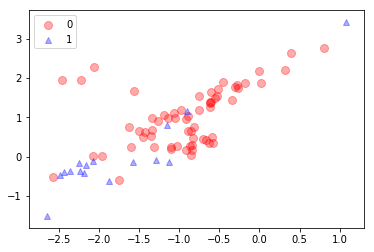

In [16]:
plot(X_train_reduced, y_train)

In [17]:
manigpclf.evaluate(manigpclf.model, X_train, y_train, manigpclf.random_state)

0.8903769841269842

In [18]:
#-------------------------------------------------

In [19]:
X_test_reduced = manigpclf.reduce(manigpclf.model, X_test)

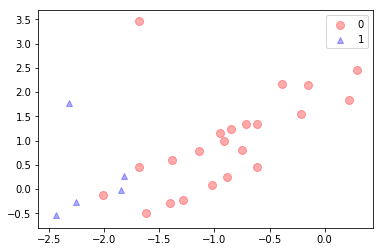

In [20]:
plot(X_test_reduced, y_test)

In [21]:
from utils.metrics import balanced_accuracy_score

In [22]:
balanced_accuracy_score(y_test, manigpclf.predict(X_test))

0.6727272727272727

In [23]:
manigpclf.rejected

29394

In [24]:
manigpclf.mut_count

47992

In [25]:
manigpclf.cx_count

2401

In [26]:
X_train_reduced

array([[-5.77281192e-01,  3.41419864e-01],
       [-1.10242086e+00,  2.51521298e-01],
       [-1.62011173e+00,  7.58620690e-01],
       [-2.23463687e+00, -3.65111562e-01],
       [-8.52886406e-01,  3.18721249e-02],
       [-2.83054004e-01,  1.81809045e+00],
       [-9.05027933e-01,  1.15477387e+00],
       [-8.19366853e-01,  7.58620690e-01],
       [-8.37988827e-01,  2.85138457e-01],
       [-2.46182495e+00,  1.94320487e+00],
       [-6.21973929e-01,  1.35577889e+00],
       [-1.18435754e+00,  1.05829146e+00],
       [-2.64432030e-01,  1.73768844e+00],
       [-1.33705773e+00,  6.84422111e-01],
       [-2.07821229e+00, -1.19597990e-01],
       [-6.03351955e-01,  1.64522613e+00],
       [-1.26629423e+00,  9.17587940e-01],
       [-1.44878957e+00,  5.03517588e-01],
       [-8.86405959e-01,  1.03417085e+00],
       [-7.56052142e-01,  1.17487437e+00],
       [-4.44089210e-16,  2.17587940e+00],
       [-2.15642458e+00, -2.04020101e-01],
       [-8.23091248e-01,  4.78701826e-01],
       [-6.